# **Algorithm Group 4**

## Problem 1

### * Importing Packages

In [2]:
# import packages
import urllib.request, urllib.error, urllib.parse
import ssl
import matplotlib.pyplot as plt # for plotting graph
import numpy as np

### * Base Methods

In [3]:
def getStopWords():
    f = open("C:\\Users\\User\\PycharmProjects\\Algo\\Files\\stop_words.txt", 'r') # read text file storing stopwords
    stop_words = []
    for word in f: # return list of stopwords
        stop_words.append(word[:-1])
    return stop_words

In [4]:
def stripTags(pageContents): # web scrapping
    pageContents = str(pageContents) # convert to string
    startLoc = pageContents.find("<p>")
    endLoc = pageContents.rfind("<br/>")

    pageContents = pageContents[startLoc:endLoc]

    inside = 0
    text = ''

    for char in pageContents:
        if char == '<':
            inside = 1
        elif (inside == 1 and char == '>'):
            inside = 0
        elif inside == 1:
            continue
        else:
            text += char

    return text

# Given a text string, remove all non-alphanumeric
# characters (using Unicode definition of alphanumeric).

In [5]:
def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)

# Given a list of words, return a dictionary of
# word-frequency pairs.

In [6]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

# Sort a dictionary of word-frequency pairs in
# order of descending frequency.

In [7]:
def sortFreqDict(freqdict):
    return {k: v for k, v in sorted(freqdict.items(), key=lambda item: item[1], reverse=True)}

# Given a list of words, remove any that are
# in a list of stop words.

In [8]:
def removeStopwords(wordlist, stopwords): # remove stopwords in the word list
    return [w for w in wordlist if w not in stopwords]

In [9]:
def get_positiveWords():
    f = open("C:\\Users\\User\\PycharmProjects\\Algo\\Files\\positive_words.txt", 'r') # read text file storing positive words
    content_list = f.read().split(",")

    positive_words = []
    for word in content_list: # return list of positive words
        positive_words.append(word.strip())
    return positive_words

In [10]:
def get_negativeWords():
    f = open("C:\\Users\\User\\PycharmProjects\\Algo\\Files\\negative_words.txt", 'r') # read text file storing negative words
    content_list = f.read().split(",")
    negative_words = []
    for word in content_list: # return list of negative words
        negative_words.append(word.strip())
    return negative_words

### * Rabin Karp Algortihm

In [11]:
def rabinkarp(T,P,d,q):  # define function for Rabin Karp Algorithm
    n = len(T)  # length of text
    m = len(P)  # length of pattern
    h = d ** (m - 1) % q
    p = 0  # hash value of pattern
    t = 0  # hash value of` text
    # assign indexes
    i = 0
    s = 0
    count = 0;

    # for loop to calculate hash value
    for i in range(m):
        p = (d * p + ord(P[i])) % q  # calculate hash value of pattern
        t = (d * t + ord(T[i])) % q  # calculate hash value of first window of text only

    # rolling hash to slide to the next window
    for s in range(n - m + 1):
        if p == t:  # check if current hash value of text window is same as pattern
            for i in range(m):  # check for characters of current window of text one by one
                if T[i + s] != P[i]:  # if character of text and pattern is not same, break
                    break
                else:
                    i += 1  # if character of text and pattern same, increment 1 to check next character

            if i == m:  # index is same as length of pattern
                count += 1

        if s < (n - m):  #
            t = (d * (t - ord(T[s]) * h) + ord(T[s + m])) % q  # calculate the hash value of next text window
          # subtract with hash value of previous character and add hash value of next character

            if t < 0:  # in case the value of t is negative, make it positive
                t = t + q

    return count

### * KMP Algorithm

In [12]:
def KMPSearch(pat, txt):
    count = 0
    M = len(pat)  # length of pattern
    N = len(txt)  # length of String
    j = 0  # index for pat[]
    i = 0  # index for txt[]

    # create an array pi[] that will hold the longest matching prefix suffix values for the pattern
    pi = [0] * M  # size of array is the length of the pattern

    # Preprocess the pattern (calculate pi[] array)
    computePIArray(pat, M, pi)
    # while i has not reached end of the String

    while i < N:  # —-------------------- O(n)
      # character in String matches with pattern
      if pat[j] == txt[i]:
        i += 1  # increment index of txt[]
        j += 1  # increment index of pat[]

      # all characters in pattern match in the String
      if j == M:
        count += 1
        j = pi[j - 1]  # continue searching for pattern in the rest of the String

      # mismatch after j matches
      elif i < N and pat[j] != txt[i]:
        if j > 0:
            j = pi[j - 1]
        else:
            i += 1  # continue searching until find a match with j[0]
    return count

In [13]:
def computePIArray(pat, M, pi):
    k = 0  # length of the previous longest prefix suffix

    pi[0] = 0  # pi[0] is always 0
    q = 1

    # the loop calculates pi[i] for i = 1 to M-1
    while q < M:  # —-------------------- O(m)
        if pat[q] == pat[k]:
            k += 1  # increment k by 1
            pi[q] = k
            q += 1  # increment q by 1
        else:
            if k != 0:
                k = pi[k - 1]  # value of k is the value of pi of index before k
                # compare matches with next value
                # if does not match, compare next until k = 0

            else:
                pi[q] = 0  # no matches with previous pat[] pi[q]= 0
                q += 1

### * NLTK Sentiment Analyzer

In [14]:
import nltk 
nltk.downloader.download('vader_lexicon') # donwload package

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
ssl._create_default_https_context = ssl._create_unverified_context

from nltk.sentiment.vader import SentimentIntensityAnalyzer # import sentiment intensity analyzer

In [16]:
def wordsDifference(first, second): # return words in first that are not in second
    return [item for item in first if item not in second]

### * Sentiment Analysis

In [17]:
def sentiment_analysis(url):
    pos_word_list = [] # create list for positive words 
    count_pos_word = [] # create list for counts of positive words
    neg_word_list = [] # create list for negative words 
    count_neg_word = [] # create list for counts of negative words
    neu_word_list = [] # create list for neutral words 
    count_neu_word = []  # create list for counts of neutral words

    sid = SentimentIntensityAnalyzer()

    response = urllib.request.urlopen(url) # read article from the link
    html = response.read().decode('UTF-8') # deocde the web content
    text = stripTags(html).lower() # remove all non-alphanumeric words
    fullwordlist = stripNonAlphaNum(text) # get word list
    wordlist = removeStopwords(fullwordlist, getStopWords()) # remove stopwords
    dictionary = wordListToFreqDict(wordlist) # get the frequency of each word

    # alternative algo method
    for s in dictionary:
        if (sid.polarity_scores(str(s))['compound']) >= 0.5:
            pos_word_list.append(str(s)) # positive words
            count_pos_word.append(dictionary[s])
        elif (sid.polarity_scores(str(s))['compound']) <= -0.5:
            neg_word_list.append(str(s)) # negative words
            count_neg_word.append(dictionary[s])
        else:
            neu_word_list.append(str(s)) # neutral words
            count_neu_word.append(dictionary[s])
            
    totalPositiveWords = 0
    for i in count_pos_word:
        totalPositiveWords += i # total number of positive words

    totalNegativeWords = 0
    for i in count_neg_word:
        totalNegativeWords += i # total number of negative words

    totalNeutralWords = 0
    for i in count_neu_word:
        totalNeutralWords += i # total number of neutral words

    print("Total Positive Words : " + str(totalPositiveWords))
    print("Total Negative Words : " + str(totalNegativeWords))

    result = [totalPositiveWords, totalNegativeWords, totalNeutralWords] # return number of all words
    return result

In [18]:
def kmpAlgorithm(url):
    response = urllib.request.urlopen(url) # read article from the link
    html = response.read().decode('UTF-8') # deocde the web content
    text = stripTags(html).lower() # remove all non-alphanumeric words
    fullwordlist = stripNonAlphaNum(text) # get word list
    wordlist = removeStopwords(fullwordlist, getStopWords())  # remove stopwords
    dictionary = wordListToFreqDict(wordlist) # get the frequency of each word
    sorteddict = sortFreqDict(dictionary)

    pos_word_list = [] # create list for positive words 
    count_pos_word = [] # create list for counts of positive words
    neg_word_list = []  # create list for negative words 
    count_neg_word = [] # create list for counts of negative words

    postive_words = get_positiveWords();
    for i in postive_words:
        count = KMPSearch(i, text) # search for positive words in the scrapped article
        if count > 0:
            pos_word_list.append(i)
            count_pos_word.append(count)
    
    negative_words = get_negativeWords();
    for i in negative_words:
        count = KMPSearch(i, text) # search for negative words in the scrapped article
        if count > 0:
            neg_word_list.append(i)
            count_neg_word.append(count)
    
    # get the neutral words by removing positive and negative words
    neu_word_list = wordsDifference(wordlist, pos_word_list) 
    neu_word_list = wordsDifference(neu_word_list, neg_word_list)

    totalPositiveWords = 0
    for i in count_pos_word: # total number of positive words
        totalPositiveWords += i

    totalNegativeWords = 0
    for i in count_neg_word: # total number of negative words
        totalNegativeWords += i
        
    print("Total Positive Words : " + str(totalPositiveWords))
    print("Total Negative Words : " + str(totalNegativeWords))
    
    count_neu_word = len(neu_word_list) # total number of neutral words
    
    result = [totalPositiveWords, totalNegativeWords, len(neu_word_list)]  # return number of all words
    return result

In [19]:
def rabinkarpAlgorithm(url):
    response = urllib.request.urlopen(url) # read article from the link
    html = response.read().decode('UTF-8') # deocde the web content
    text = stripTags(html).lower() # remove all non-alphanumeric words
    fullwordlist = stripNonAlphaNum(text) # get word list
    wordlist = removeStopwords(fullwordlist, getStopWords()) # remove stopwords
    dictionary = wordListToFreqDict(wordlist) # get the frequency of each word
    sorteddict = sortFreqDict(dictionary)

    pos_word_list = [] # create list for positive words 
    count_pos_word = [] # create list for counts of positive words
    neg_word_list = []  # create list for negative words 
    count_neg_word = [] # create list for counts of negative words

    postive_words = get_positiveWords();
    for i in postive_words:
        count = rabinkarp(text, i, 256, 101) # search for positive words in the scrapped article
        if count > 0:
            pos_word_list.append(i)
            count_pos_word.append(count)
        
    negative_words = get_negativeWords();
    for i in negative_words:
        count = rabinkarp(text, i, 256, 101) # search for negative words in the scrapped article
        if count > 0:
            neg_word_list.append(i)
            count_neg_word.append(count)

    neu_word_list = wordsDifference(wordlist, pos_word_list)
    neu_word_list = wordsDifference(neu_word_list, neg_word_list)
    
    totalPositiveWords = 0
    for i in count_pos_word:  # total number of positive words
        totalPositiveWords += i

    totalNegativeWords = 0
    for i in count_neg_word: # total number of negative words
        totalNegativeWords += i
        
    print("Total Positive Words : " + str(totalPositiveWords))
    print("Total Negative Words : " + str(totalNegativeWords))
    
    count_neu_word = len(neu_word_list) # total number of neutral words
    
    result = [totalPositiveWords, totalNegativeWords, len(neu_word_list)] # return number of all words
    return result

In [20]:
country =[]
japan = [] # Articles link for country Japan
japan.append('https://english.kyodonews.net/news/2022/05/3645980f7e25-focus-japan-economy-may-rebound-but-faces-headwind-amid-price-surge.html')
japan.append('https://www.hurriyetdailynews.com/japans-economy-shrinks-in-173873')
japan.append('https://www.nippon.com/en/in-depth/d00778/')
japan.append('https://japantoday.com/category/business/update2-japan-economic-report-drops-mention-of-coronavirus')
japan.append('https://www.brinknews.com/the-japanese-economy-has-reinvented-itself/')
country.append(japan)

china = [] # Articles link for country China
china.append('https://www.worldbank.org/en/country/china/overview#1')
china.append('https://www.frontiersin.org/articles/10.3389/fpubh.2021.787190/full')
china.append('https://observer.com/2022/05/china-economy-slowdown-zero-covid-lockdown/')
china.append('https://www.straitstimes.com/asia/east-asia/how-covid-19-restrictions-are-choking-chinas-economy-asian-insider')
china.append('https://www.aljazeera.com/economy/2022/5/11/china-resorts-to-old-economic-tools-as-lockdowns-bite')
country.append(china)

UAE = [] # Articles link for country UAE
UAE.append('https://www.arabnews.com/node/2092066/business-economy')
UAE.append('https://www.khaleejtimes.com/property/dubai-apartment-rents-increase-by-up-to-25-in-some-areas')
UAE.append('https://www.arabnews.com/node/2092251/business-economy')
UAE.append('https://gulfnews.com/uae/government/shorter-uae-work-week-highlights-high-adaptability-of-government-world-economic-forum-hears-1.88177737')
UAE.append('https://www.khaleejtimes.com/business/uae-highlights-national-vision-at-world-economic-forum')
country.append(UAE)

canada = [] # Articles link for country Canada
canada.append('https://www.investopedia.com/articles/investing/042315/fundamentals-how-canada-makes-its-money.asp')
canada.append('https://www3.ohrc.on.ca/en/search/site')
canada.append('https://www.canada.ca/en/impact-assessment-agency/services/policy-guidance/practitioners-guide-impact-assessment-act/analyzing-health-social-economic-effects-impact-assessment-act.html')
canada.append('https://www.canada.ca/en/department-finance/services/publications/economic-fiscal-snapshot/overview-economic-response-plan.html')
canada.append('https://theconversation.com/antiquated-thinking-about-old-age-hinders-canadas-economic-and-social-development-182367')
country.append(canada)

greatBritain = [] # Articles link for country Great Britain
greatBritain.append('https://www.gov.uk/government/publications/uk-and-indiana-trade-and-economic-memorandum-of-understanding/memorandum-of-understanding-on-economic-cooperation-and-trade-relations-between-indiana-and-the-united-kingdom')
greatBritain.append('https://www.cnbc.com/2022/05/12/uk-economy-shrinks-in-march-grows-0point8percent-in-q1.html')
greatBritain.append('https://www.ft.com/content/af0d30bd-f6ee-4ab4-abfe-94e58aa27b12')
greatBritain.append('https://www.oecd.org/economy/united-kingdom-economic-snapshot/')
greatBritain.append('https://eacea.ec.europa.eu/national-policies/eurydice/content/political-social-and-economic-background-and-trends-93_en')
country.append(greatBritain)

In [21]:
totalNumberOfWords = [] # total words
countryAverageSentiment = [] # sentiment score for each country
netSentiment = 0
for i in range(len(country)):
    countryNumberOfWords = []
    for j in range(len(country[i])):
        print("Calculating Result for Country " + str(i+1) + " Article " + str(j+1) + " :-")
#         result = rabinkarpAlgorithm(country[i][j]) # rabin karp algorithm
#         result = kmpAlgorithm(country[i][j]) # kmp algorithm
        result = sentiment_analysis(country[i][j]) # using nltk library
        countryNumberOfWords.append(result)
        res1 = "{:.2f}".format(result[0] / np.sum(result) * 100) # round to two decimal places
        res2 = "{:.2f}".format(result[1] / np.sum(result) * 100) # round to two decimal places
        netSentiment += np.round((float(res1) - float(res2)),2) # calculate net sentiment by subtrating postive with negative
    totalNumberOfWords.append(countryNumberOfWords)
    print()
    countryAverageSentiment.append(np.round(netSentiment/5,2))

#create country sentiment dictionary
countrySentimentDict = {"Japan":countryAverageSentiment[0], "China":countryAverageSentiment[1], "UAE":countryAverageSentiment[2], "Canada":countryAverageSentiment[3], "Great Britain":countryAverageSentiment[4]}

Calculating Result for Country 1 Article 1 :-
Total Positive Words : 2
Total Negative Words : 8
Calculating Result for Country 1 Article 2 :-
Total Positive Words : 4
Total Negative Words : 5
Calculating Result for Country 1 Article 3 :-
Total Positive Words : 6
Total Negative Words : 5
Calculating Result for Country 1 Article 4 :-
Total Positive Words : 2
Total Negative Words : 4
Calculating Result for Country 1 Article 5 :-
Total Positive Words : 11
Total Negative Words : 3

Calculating Result for Country 2 Article 1 :-
Total Positive Words : 5
Total Negative Words : 10
Calculating Result for Country 2 Article 2 :-
Total Positive Words : 13
Total Negative Words : 13
Calculating Result for Country 2 Article 3 :-
Total Positive Words : 5
Total Negative Words : 3
Calculating Result for Country 2 Article 4 :-
Total Positive Words : 4
Total Negative Words : 3
Calculating Result for Country 2 Article 5 :-
Total Positive Words : 2
Total Negative Words : 7

Calculating Result for Country 3 A

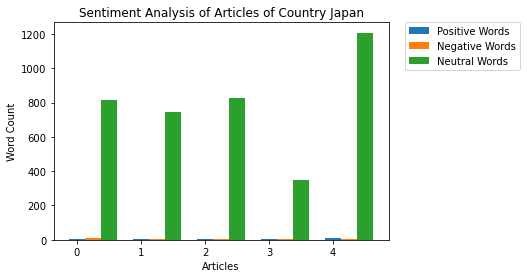

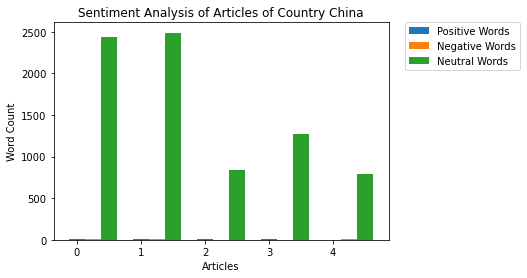

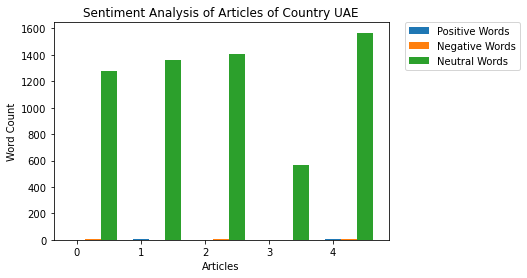

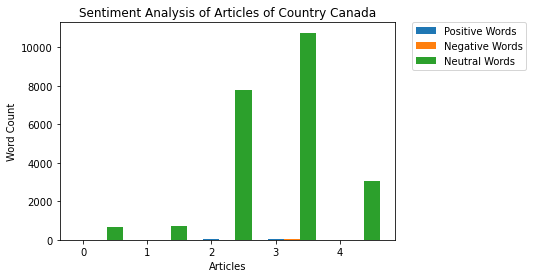

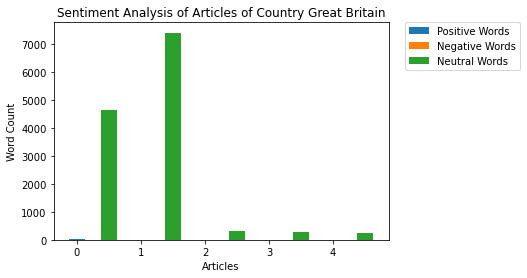

In [22]:
w = 0.25 # bar width
countryName = list(countrySentimentDict.keys())

# plot bar chart for all articles categorized by country
for i in range(len(totalNumberOfWords)):
    positiveWords = [i[0] for i in totalNumberOfWords[i]]
    negativeWords = [i[1] for i in totalNumberOfWords[i]]
    neutralWords = [i[2] for i in totalNumberOfWords[i]]

    bar1 = np.arange(len(totalNumberOfWords[0]))
    bar2 = [x + w for x in bar1]
    bar3 = [x + w for x in bar2]

    plt.bar(bar1,positiveWords,w,label="Positive Words")
    plt.bar(bar2,negativeWords,w,label="Negative Words")
    plt.bar(bar3,neutralWords,w,label="Neutral Words")

    plt.xlabel("Articles")
    plt.ylabel("Word Count")
    plt.title("Sentiment Analysis of Articles of Country " + countryName[i])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

Based on the analysis of net sentiment, the ranking of countries from best to worst is as below:- 

1th Position : Great Britain with average net sentiment of 0.28

2th Position : Canada with average net sentiment of -0.12

3th Position : Japan with average net sentiment of -0.13

4th Position : China with average net sentiment of -0.24

5th Position : UAE with average net sentiment of -0.32



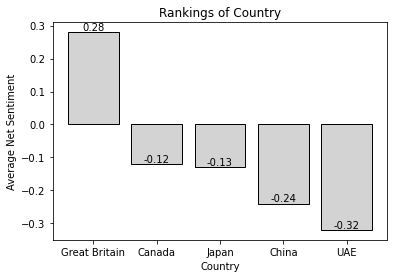

In [23]:
print("Based on the analysis of net sentiment, the ranking of countries from best to worst is as below:- \n")
sortedCountry = sortFreqDict(countrySentimentDict) # sort country sentiment dictionary
sortedKey = list(sortedCountry.keys()) # sorted country names
sortedValues = list(sortedCountry.values()) # sorted sentiment values

for i in range(len(sortedCountry)):
    print(str(i+1) + "th Position : " + sortedKey[i] + " with average net sentiment of " + str(sortedValues[i]) + "\n")

# plot bar chart to depict ranking
plt.bar(sortedKey, sortedValues, fc="lightgray", ec="black")
plt.xlabel("Country")
plt.ylabel("Average Net Sentiment")
plt.title("Rankings of Country")

for i in range(len(sortedKey)):
    plt.text(i,sortedValues[i],sortedValues[i],ha="center",va="bottom")

plt.show()

## Problem 2

### * Import Packages

In [24]:
# import packages
import pandas as pd # for dataframe
import requests
import folium # for map plotting
import sys

### * Greedy Algorithm

In [25]:
def greedyAlgorithm(data, center, matrix_list):
    unvisited = data.values.tolist() # list containing all locations
    visited = [] # list containing visited locations
    totalDistance = 0 # total distance travelled

    visited = [x for x in unvisited if (center==x)] # insert center as first visited location
    unvisited.remove(visited[0]) # remove center location

    while (not len(unvisited) == 0): # run loop until all locations are traversed
        shortestDistance = sys.maxsize # set maximum number to compare
        currentNode = visited[-1] # set current node as last visited location
        nextNode = [] # next node to visit
        for i in range(len(unvisited)): # run loop for all locations in unvisited list
            currentNextNode = unvisited[i] # current next node in unvisited list
            distance = greedyCalculateDistance(data, matrix_list, currentNode, currentNextNode) # calculate the distance between the nodes
            if ((distance < shortestDistance) and (not distance == 0)): # compare if the distance is shorter than previous
                nextNode = currentNextNode # change the node to next node to visit
                shortestDistance = distance # change the shortest distance
        totalDistance += shortestDistance # append the final shortest distance after looping
        unvisited.remove(nextNode) # remove the next node visited from unvisited list
        visited.append(nextNode) # append the node in the visited list
    # add the distance of last visited location and distribution center
    totalDistance += greedyCalculateDistance(data, matrix_list, visited[-1],visited[0])
    visited.append(visited[0]) # append the center as the last visited location
    return (visited,totalDistance) # return the route with distance travelled

In [26]:
def greedyCalculateDistance(data, matrix_list, origin, destination): # define function to calculate distance
    locations = data.values.tolist() # convert the locations dataframe into list
    startLoc = locations.index(origin) # get the index of origin location
    finalLoc = locations.index(destination) # get the index of destination location

    return matrix_list[startLoc][finalLoc] # return the distance between origin and destination

### * Naives Algorithm

In [27]:
def naivesAlgorithm(data, center, distanceMatrix):
    # Methode for naive algorithm
    totalDistance = 0 # varaible to store total distance of shortest route
    route = [] # variable to store shortest route
    stores = data.values.tolist() # list of all stores in data
    stores_list = stores.copy() # copy of list of stores
    stores_list.remove(center) # removed distribution center from the copied store list
    numbers = naiveGetIndexes(data, stores_list) # converting the list of stores to list of indexes corresponding to the stores
    l = naivePermutation(numbers) # permuting the list and storing all the possible route
    minDis = sys.maxsize # assigning the largest possible number as shortest distance
    for i in l: # iterating through the list of all possible route
        i.insert(0, naiveGetIndex(data, center)) # adding distribution center at start of route
        i.append(naiveGetIndex(data, center)) # appending distribution center at end of route
        totalDis = 0 # varible to temporarily store total distance of route
        for j in range(len(i) - 1):
            totalDis += distanceMatrix[i[j]][i[j+1]] # calculating total distance of route
        if (minDis >= totalDis): # if current route's total distance is less than shortest distance
            minDis = totalDis # assign current route's total distance to shortest distance
            route = i # assign current route to shortest route 
    totalDistance = minDis # assign shortest route's distance
    storeOrderList = naiveGetLocations(stores,route) # converting list of indexes back to list of stores
    return (storeOrderList,totalDistance) # return shortest route and its distance

In [28]:
def naivePermutation(lst):
    # Method for permutation
    if len(lst) == 0:
        # return empty list if the list has no elelment
        return []
    if len(lst) == 1:
        # return the list back if it has 1 element
        return [lst]
    l = []
    for i in range(len(lst)):
        m = lst[i]
        remLst = lst[:i] + lst[i + 1:]
        # taking one element away from the list
        for p in naivePermutation(remLst):
            # permuting again the list with remaining element
            l.append([m] + p)
    # return the list of permutations
    return l

In [29]:
def naiveCalculateDistance(stores, matrix, origin, destination):
    # Method to calculate distance between two stores
    startLoc = stores.index(origin) # Get the index of first store
    finalLoc = stores.index(destination) # Get the index of second store

    return matrix[startLoc][finalLoc] # get the distance from distance matrix 

In [30]:
def naiveGetIndexes(data, stores):
    # method to convert list of stores to list of indexes corresponding to the stores
    numbers = [] # varible to store the indexes
    startingIndexofDataFrame = data.index[0] # starting index of stores in data
    for i in range(len(stores)):
        index = (data[data['name']==stores[i][2]].index[0]) - startingIndexofDataFrame
        # converting the list of stores to list of its indexes
        numbers.append(index)
    return numbers # return the converted list 

In [31]:
def naiveGetIndex(data, location):
    # method to get index of one store
    startingIndexofDataFrame = data.index[0] # starting index of stores in data
    index = (data[data['name'] == location[2]].index[0]) - startingIndexofDataFrame
    # finding the index of the store
    return index # return the index found

In [32]:
def naiveGetLocations(stores, indexes):
    # method to convert list of indexes of stores to list of stores
    storeRoute = [] # variable to store the stores
    for i in indexes:
        storeRoute.append(stores[i]) # converting each index to its coresponding store
    return storeRoute # return list of stores

### * Two Opt Algorithm

In [33]:
def twoOpt_Algorithm(data, centre, distanceMatrix): # Two Opt Algorithm
    store_list = data.values.tolist() # get stores list
    best_route = [] # intialise best route
    totalDistance = 0 # intialise total distance travelled
    route = []
    indexOfCentre = twoOpt_getIndex(data, centre) # get index of distribution centre
    route.append(indexOfCentre) # append index of distribution centre
    locationIndexes = twoOpt_getIndexes(data, store_list)
    for x in range(0, len(locationIndexes)): # append index of other locations
        if(x != indexOfCentre):
            route.append(x)
    route.append(indexOfCentre) # append index of distribution centre
    best = route 
    improved = True # Perform Two-Opt Algorithm
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                if twoOpt_cost_change(distanceMatrix, best[i - 1], best[i], best[j - 1], best[j]) < 0:  # check for cost change
                    best[i:j] = best[j - 1:i - 1:-1]
                    improved = True
        route = best
    best_route = twoOpt_getLocations(store_list, route) # change indices of locations to list
    totalDistance = twoOpt_calculateDistance(distanceMatrix, route) # get total distance travelled
    return (best_route,totalDistance)

In [34]:
def twoOpt_cost_change(distanceMatrix, n1, n2, n3, n4): # calculate cost change (cost refers to distance)
        return distanceMatrix[n1][n3] + distanceMatrix[n2][n4] - distanceMatrix[n1][n2] - distanceMatrix[n3][n4]

In [35]:
def twoOpt_getIndex(data, location): # change location list into specific index
    startingIndexofDataFrame = data.index[0]
    index = (data[data['name'] == location[2]].index[0]) - startingIndexofDataFrame
    return index

In [36]:
def twoOpt_getIndexes(data, route): # change all location into indices
    numbers = []
    startingIndexofDataFrame = data.index[0]
    for i in range(len(route)):
        index = (data[data['name']==route[i][2]].index[0]) - startingIndexofDataFrame
        numbers.append(index)
    return numbers

In [37]:
def twoOpt_getLocations(stores, indexes): # change indices back to locations list
    storeRoute = []
    for i in indexes:
        storeRoute.append(stores[i])
    return storeRoute

In [38]:
def twoOpt_calculateDistance(matrixDistance, route): # calcualte the distance between location
    totalRouteDistance = 0
    for i in range(len(route)-1):
        totalRouteDistance += matrixDistance[route[i]][route[i+1]]
    return totalRouteDistance

### * Calculating Routes and Plotting

In [39]:
def makeRequest(startlat, startlong, endlat, endlong):
    base_url = "https://api.tomtom.com/routing/1/calculateRoute/" # base url of TomTom API
    api_key = "4P8kUosgoy0hmnagRxsoM667nZufIkHV" # API key
    url = "%s/%s,%s:%s,%s/json?key=%s&traffic=false&routeType=shortest" % (
        base_url, str(startlat), str(startlong), str(endlat), str(endlong), api_key)
    # logging.info("URL: %s" % url)
    result = requests.get(url) # request to API 
    return result.json() # return in json format

In [40]:
def getRoutePoints(data, direc, matrix):
    print("-----Calculating Distances-----")
    for i in range(len(data)):
        for j in range(len(data)):
            try:
                # dir  = directions in json format
                dir = makeRequest(data.iloc[i, 0], data.iloc[i, 1], data.iloc[j, 0], data.iloc[j, 1]) # request to TomTom API
                direc[i][j] = dir['routes'][0]['legs'][0]['points'] # store points in 2d array
                matrix[i][j] = int(dir['routes'][0]['summary']['lengthInMeters']) / 1000 # store distance between location in matrix
            except Exception as e:
                print(e)
            continue
  
    output = (matrix, direc)
    return output

In [41]:
def findBestCentre(matrix, stores_list): # find distribution centre
    print("-----Picking Distribution Centre-----")
    bestdis = sys.maxsize # assign maximum number
    best = -1 # assign a non-index
    for i in range(len(matrix)):
        totalDis = 0 # initialise total distace = 0
        for j in range(len(matrix[i])):
            totalDis += matrix[i][j] # calculate the total distance between all locations and location in index i
        matrix[i].append(totalDis)
        if (bestdis >= totalDis): # find the location with minimum total distance between all locations
            bestdis = totalDis
            best = i
    bestCentre = stores_list[best] # get the index location from list of stores
    print("The Distribution Centre : " + str(bestCentre[2]))
    return bestCentre

In [42]:
def greedy(data, bestCentre, matrix):
    routeAndTotalDistance = greedyAlgorithm(data, bestCentre, matrix) # call greedy algorithm
    route = routeAndTotalDistance[0]
    totalDistance = routeAndTotalDistance[1]
    routeToString = route[0][2]
    for i in range(1, len(route)):
        routeToString += " ---> " + route[i][2]
    print("Greedy Algorithm Route: " + routeToString) # print route
    format_totaldistance = "{:.2f}".format(totalDistance)
    print("Total Distance Travelled : " + str(format_totaldistance) + " KM") # print total distance
    return routeAndTotalDistance

In [43]:
def naives(data, bestCentre, matrix):
    routeAndTotalDistance = naivesAlgorithm(data, bestCentre, matrix) # call naive algorithm
    route = routeAndTotalDistance[0]
    totalDistance = routeAndTotalDistance[1]
    routeToString = route[0][2]
    for i in range(1, len(route)):
        routeToString += " ---> " + route[i][2]
    print("Naives Algorithm Route: " + routeToString) # print route
    format_totaldistance = "{:.2f}".format(totalDistance)
    print("Total Distance Travelled : " + str(format_totaldistance) + " KM") # print total distance
    return routeAndTotalDistance

In [44]:
def twoOpt(data, bestCentre, matrix):
    routeAndTotalDistance = twoOpt_Algorithm(data, bestCentre, matrix)
    route = routeAndTotalDistance[0]
    totalDistance = routeAndTotalDistance[1]
    routeToString = route[0][2]
    for i in range(1, len(route)):
        routeToString += " ---> " + route[i][2]
    print("Two Opt Algorithm Route: " + routeToString)
    format_totaldistance = "{:.2f}".format(totalDistance)
    print("Total Distance Travelled : " + str(format_totaldistance) + " KM") # print total distance
    return routeAndTotalDistance

In [45]:
def getIndexes(route, data): # convert route into index form of integers
    numbers = []
    startingIndexofDataFrame = data.index[0]
    for i in range(len(route)):
        index = (data[data['name'] == route[i][2]].index[0]) - startingIndexofDataFrame # index starts from 0
        numbers.append(index)
    return numbers

In [46]:
def calculateDistance(stores_list, origin, destination, matrix):
    startLoc = stores_list.index(origin) # get index of origin
    finalLoc = stores_list.index(destination) # get index of destination

    return matrix[startLoc][finalLoc] # return distance

In [47]:
def getRouteAndDistance(stores_list, route, data, matrix):
    distance = [] # create list for distance
    x = 0
    for i in range(len(route) - 1):
        x += int(calculateDistance(stores_list, route[i], route[i + 1], matrix)) # calculate total distance of the route
        distance.append(x)
    routeAndDist = (getIndexes(route, data), distance) # return tuple of route and distance
    return routeAndDist

In [48]:
def createMap(route, stores_list, bestCentre, data, matrix, direc, country): # create map using TomTom API
        routewithDistance = getRouteAndDistance(stores_list, route, data, matrix) # get route and total distance
        map = folium.Map(location=[bestCentre[0], bestCentre[1]], zoom_start=8) # initialise map
        for i in range(len(routewithDistance[0]) - 1):
            j = direc[routewithDistance[0][i]][routewithDistance[0][i + 1]] # calculate distance between
            if (i == len(routewithDistance[0]) - 2):
                # plot markers for centre distribution
                folium.Marker(location=[data.iloc[routewithDistance[0][i + 1], 0],
                                        data.iloc[routewithDistance[0][i + 1], 1]],
                              popup=(data.iloc[routewithDistance[0][i + 1], 2] + " (Dc) \nDis: " +
                                     str(routewithDistance[1][i]) + "km"),
                              icon=folium.Icon(color='red', prefix='fa', icon='anchor')).add_to(map)
            else:
                # plot markers for other locations
                num_Icon = folium.DivIcon(icon_size=(150, 36), icon_anchor=(4, 38),
                                          html="""<div style="font-size: 14pt; color : white">{:d}</div>""".format(
                                              i + 1))
                folium.Marker(location=[data.iloc[routewithDistance[0][i + 1], 0],
                                        data.iloc[routewithDistance[0][i + 1], 1]],
                              popup=(data.iloc[routewithDistance[0][i + 1], 2] + " \nDis: " +
                                     str(routewithDistance[1][i]) + "km"),
                              icon=folium.Icon(color='green', icon='')).add_to(map)
                folium.Marker(location=[data.iloc[routewithDistance[0][i + 1], 0],
                                        data.iloc[routewithDistance[0][i + 1], 1]],
                              popup=(data.iloc[routewithDistance[0][i + 1], 2] + " \nDis: " +
                                     str(routewithDistance[1][i]) + "km"), icon=num_Icon).add_to(map)
            print("---ploting " + str(data.iloc[routewithDistance[0][i], 2]) + " to " +
                  str(data.iloc[routewithDistance[0][i + 1], 2]) + "---")
            # plot route between locations
            for k in range(len(j)):
                if (k == 0):
                    ori = (j[k]['latitude'], j[k]['longitude'])
                    continue
                des = (j[k]['latitude'], j[k]['longitude'])
                folium.PolyLine(locations=[ori, des], line_opacity=0.5).add_to(map)
                ori = (j[k]['latitude'], j[k]['longitude'])
        return map

In [49]:
def plotMap(map): # show map
    display(map)

In [50]:
def runAll(data, country):
    matrix = [[0 for i in range(0, len(data))] for j in range(0, len(data))] # matrix to store distance matrix
    direc = [[dict() for i in range(len(data))] for j in range(len(data))] # dictionary to store route points
    bestCentre = [] # distribution centre
    totalDistance = 0 # total distance
    stores_list = data.values.tolist() # get stores list

    matrixAndDirec = getRoutePoints(data, direc, matrix) # 
    distancematrix = matrixAndDirec[0]
    direc = matrixAndDirec[1]
    bestCentre = findBestCentre(matrix, stores_list)
    routeAndTotalDistance = greedy(data, bestCentre, matrix)
#     routeAndTotalDistance = naives(data, bestCentre, matrix)
#     routeAndTotalDistance = twoOpt(data, bestCentre, matrix)
    routeTotalDistanceList.append(routeAndTotalDistance)
    map = createMap(routeAndTotalDistance[0], stores_list, bestCentre, data, matrix, direc, country)
#     plotMap(map)

In [51]:
print("~~~~~~~~~~~~BEGIN~~~~~~~~~~~")
countries = ["JP","CN","AE","CA","GB"] #"JP","CN","AE","CA","GB"
routeTotalDistanceList = [] # create list for route path and total distance
sheet_id = '1-VMr9O2n1EEogU30DmAhRoF02xz0dmUaD-1143mSL-E' # google sheet unique ID
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv") # read csv file

for country in countries:
    data = df.loc[df["state"] == country, ["latitude", "longitude", "name"]].head(7) # get the locations details
    data = data.reset_index(drop=True) # reset the index

    runAll(data, country)
print("~~~~~~~~~~~~END~~~~~~~~~~~")
countryDistance = {countries[i]: routeTotalDistanceList[i][1] for i in range(len(countries))} # dictionary for total distances
sortedCountries = sorted(countryDistance.items(), key=lambda x: x[1]) # sort the dictionary based on distance values

for i in range(len(sortedCountries)):
    distance = "{:.2f}".format(sortedCountries[i][1])
    print("Country in " + str(i + 1) + " th Position : " + sortedCountries[i][0] + " (" + distance + "KM)")

~~~~~~~~~~~~BEGIN~~~~~~~~~~~
-----Calculating Distances-----
-----Picking Distribution Centre-----
The Distribution Centre : Matsumoto Nagisa Life Site
Greedy Algorithm Route: Matsumoto Nagisa Life Site ---> KARUIZAWA PRINCE SHOPPING PLAZA ---> atre Ebisu (2F) ---> TSUTAYA Kyoto Reseach Park ---> ACTA Nishinomiya ---> Kumamoto You Me Town Hikarinomori ---> AEON MALL Morioka ---> Matsumoto Nagisa Life Site
Total Distance Travelled : 3692.18 KM
---ploting Matsumoto Nagisa Life Site to KARUIZAWA PRINCE SHOPPING PLAZA---
---ploting KARUIZAWA PRINCE SHOPPING PLAZA to atre Ebisu (2F)---
---ploting atre Ebisu (2F) to TSUTAYA Kyoto Reseach Park---
---ploting TSUTAYA Kyoto Reseach Park to ACTA Nishinomiya---
---ploting ACTA Nishinomiya to Kumamoto You Me Town Hikarinomori---
---ploting Kumamoto You Me Town Hikarinomori to AEON MALL Morioka---
---ploting AEON MALL Morioka to Matsumoto Nagisa Life Site---
-----Calculating Distances-----
-----Picking Distribution Centre-----
The Distribution Centr

## Problem 3

### * Ranking 

In [52]:
def minimumval(sentimentList, distanceList): # define function minimumval
    minValues = [min(sentimentList),min(distanceList)] # return minimum values of sentiment and distance

    return minValues

In [53]:
def maximumval(sentimentList,distanceList): # define function maximumval
    maxValues = [max(sentimentList),max(distanceList)] # return maximum values of sentiment and distance

    return maxValues

In [54]:
def calculateSentimentScore(sentimentList,distanceList): # calculate sentiment score using min max normalization
    # score = (value-min/max-min) x weight

    sentimentScore = [] # initialise lsit for sentiment score
    min = minimumval(sentimentList,distanceList)[0] # get the minimum sentiment score
    max = maximumval(sentimentList,distanceList)[0] # get the maximum sentiment score
    factor = max - min # denominator
    for i in range(len(sentimentList)):
        score = ((sentimentList[i] - (min-0.01))/factor)*50  # calculate sentiment score
        sentimentScore.append(score)
          
    return sentimentScore

In [55]:
def calculateDistanceScore(sentimentList,distanceList): # calculate distance score using reverse min max normalization
    # score = (max-value/max-min) x weight

    distanceScore = [] # initialise list for distance score
    min = minimumval(sentimentList,distanceList)[1] # get the minimum distance score
    max = maximumval(sentimentList,distanceList)[1] # get the maximum distance score
    factor = max - min # denominator
    for i in range(len(distanceList)):
        score = (((max+0.01)-distanceList[i])/factor)*50  # calculate distance score
        distanceScore.append(score)
    
    return distanceScore

In [56]:
def overallScore(sentimentList,distanceList): # calculate overall score based on sentiment and distance
    #sentimentScore + distanceScore
    overallScore = [] # initialise list for sentiment score
    for i in range(len(sentimentList)):
        overallScore.append(calculateSentimentScore(sentimentList,distanceList)[i] + calculateDistanceScore(sentimentList,distanceList)[i])
    
    return overallScore

In [57]:
def calculateProbability(sentimentList, distanceList): # calculate probability of selecting each country
    prob = [] # intitialise list for probability
    overall_Score = overallScore(sentimentList, distanceList) # calculate overall score
    total = sum(overall_Score) # sum of all countries overall score
    for i in range(len(overall_Score)):
        temp = overall_Score[i] / total # calcuate probability using score per total score
        prob.append(temp)

    return prob

In [58]:
def sortProb(sentimentList,distanceList): # sorting the country based on overall score
    probability  = calculateProbability(sentimentList,distanceList) # caluclate probability of each country


    # quicksort totalscore
    def partition(l, r, list):
        pivot, pointer = list[r], l # assign pivot and pointer
        for i in range(l, r): 
            if list[i] <= pivot: # check if element is smaller than pivot
                list[i], list[pointer] = list[pointer], list[i]
                pointer += 1
        list[pointer], list[r] = list[r], list[pointer]
        return pointer

    def quicksort(l, r, list):
        if len(list) == 1:
            return list
        if l < r:
            pi = partition(l, r, list)
            quicksort(l, pi - 1, list)
            quicksort(pi + 1, r, list)
        return list


    sortedProb = quicksort(0,len(probability)-1,probability) # call quick sort

    sortedProb.reverse() # reverse the order after sorting

    return sortedProb

In [59]:
def sortCountries(countries,sentimentList,distanceList):
    countrylist = countries # copy of countries
    unsortedScore = calculateProbability(sentimentList, distanceList) # calculate probability
    sortedOverallScore = sortProb(sentimentList,distanceList) # sort probability
    sortedCountrylist = [] # final sorted countries
    
    # get rankings of country based on overall score
    for i in range(len(sortedOverallScore)):
        for j in range(len(unsortedScore)):
            if(sortedOverallScore[i] == unsortedScore[j]):
                sortedCountrylist.append(countries[j])

    return sortedCountrylist

In [60]:
def plotPie(rankedCountries,scores): # plot pie chart
    mylabels = ["Great Britain","UAE","China","Canada","Japan"] # set labels
    y = [scores[0],scores[1],scores[2],scores[3],scores[4]] # set Y values
    plt.pie(y, labels=mylabels, explode=[0.2, 0, 0, 0, 0], shadow=True, autopct=lambda p: '{:.4f}%'.format(p), startangle = 180)
    plt.title("Probability of Selecting Country to Expand Business") # set title
    plt.show()

### Final Output

In [61]:
def Ranking(countries, sentimentList, distanceList): # ranking the countries
    rankedCountries = sortCountries(countries, sentimentList, distanceList) # sort countries

    scores = sortProb(sentimentList, distanceList) # sort scores

    print("\n\t\tThe ranking on the countries based on the score ")
    print("\n-------------------------------------------------------------------------")

    for i in range(len(rankedCountries)): # print the rankings of countries
        format_score = "{:.5f}".format(scores[i])
        print(str(i + 1) + "st position : " + rankedCountries[i] + " with the probability of " + format_score)

    print("\nThe most recomended country is " +rankedCountries[0])
    print("\n-------------------------------------------------------------------------")
    
    plotPie(rankedCountries,scores)


		The ranking on the countries based on the score 

-------------------------------------------------------------------------
1st position : GB with the probability of 0.35360
2st position : CN with the probability of 0.24622
3st position : AE with the probability of 0.20226
4st position : CA with the probability of 0.12655
5st position : JP with the probability of 0.07137

The most recomended country is GB

-------------------------------------------------------------------------


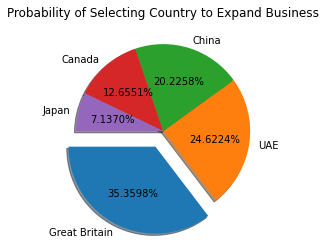

In [62]:
distanceList = list(countryDistance.values())
Ranking(countries, countryAverageSentiment, distanceList)